Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  inflating: dataset/images/2337.jpg  
  inflating: dataset/images/2338.jpg  
  inflating: dataset/images/2339.jpg  
  inflating: dataset/images/2340.jpg  
  inflating: dataset/images/2341.jpg  
  inflating: dataset/images/2342.jpg  
  inflating: dataset/images/2343.jpg  
  inflating: dataset/images/2344.jpg  
  inflating: dataset/images/2345.jpg  
  inflating: dataset/images/2346.jpg  
  inflating: dataset/images/2347.jpg  
  inflating: dataset/images/2348.jpg  
  inflating: dataset/images/2349.jpg  
  inflating: dataset/images/2350.jpg  
  inflating: dataset/images/2351.jpg  
  inflating: dataset/images/2352.jpg  
  inflating: dataset/images/2353.jpg  
  inflating: dataset/images/2354.jpg  
  inflating: dataset/images/2355.jpg  
  inflating: dataset/images/2356.jpg  
  inflating: dataset/images/2357.jpg  
  inflating: dataset/images/2358.jpg  
  inflating: dataset/images/2359.jpg  
  inflating: dataset/images/2360.jpg  
  infla

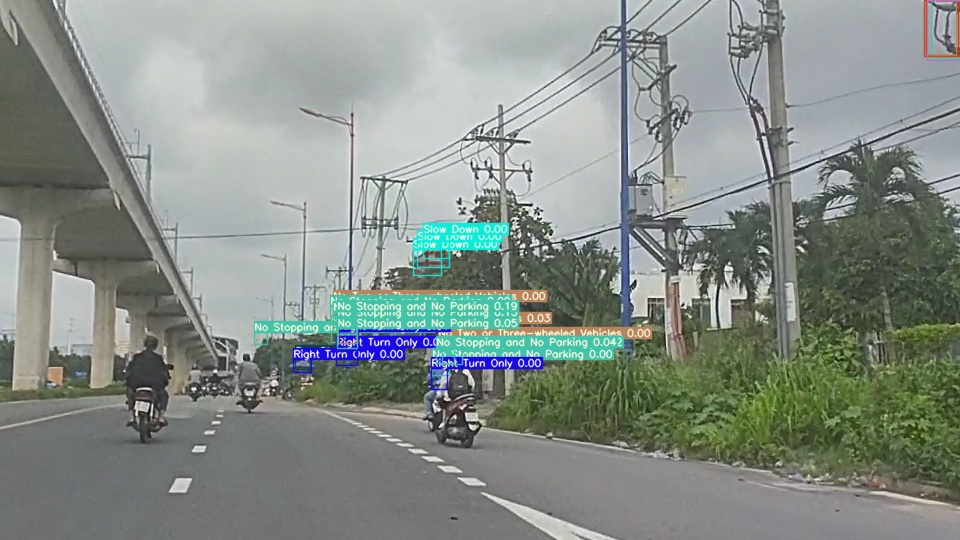

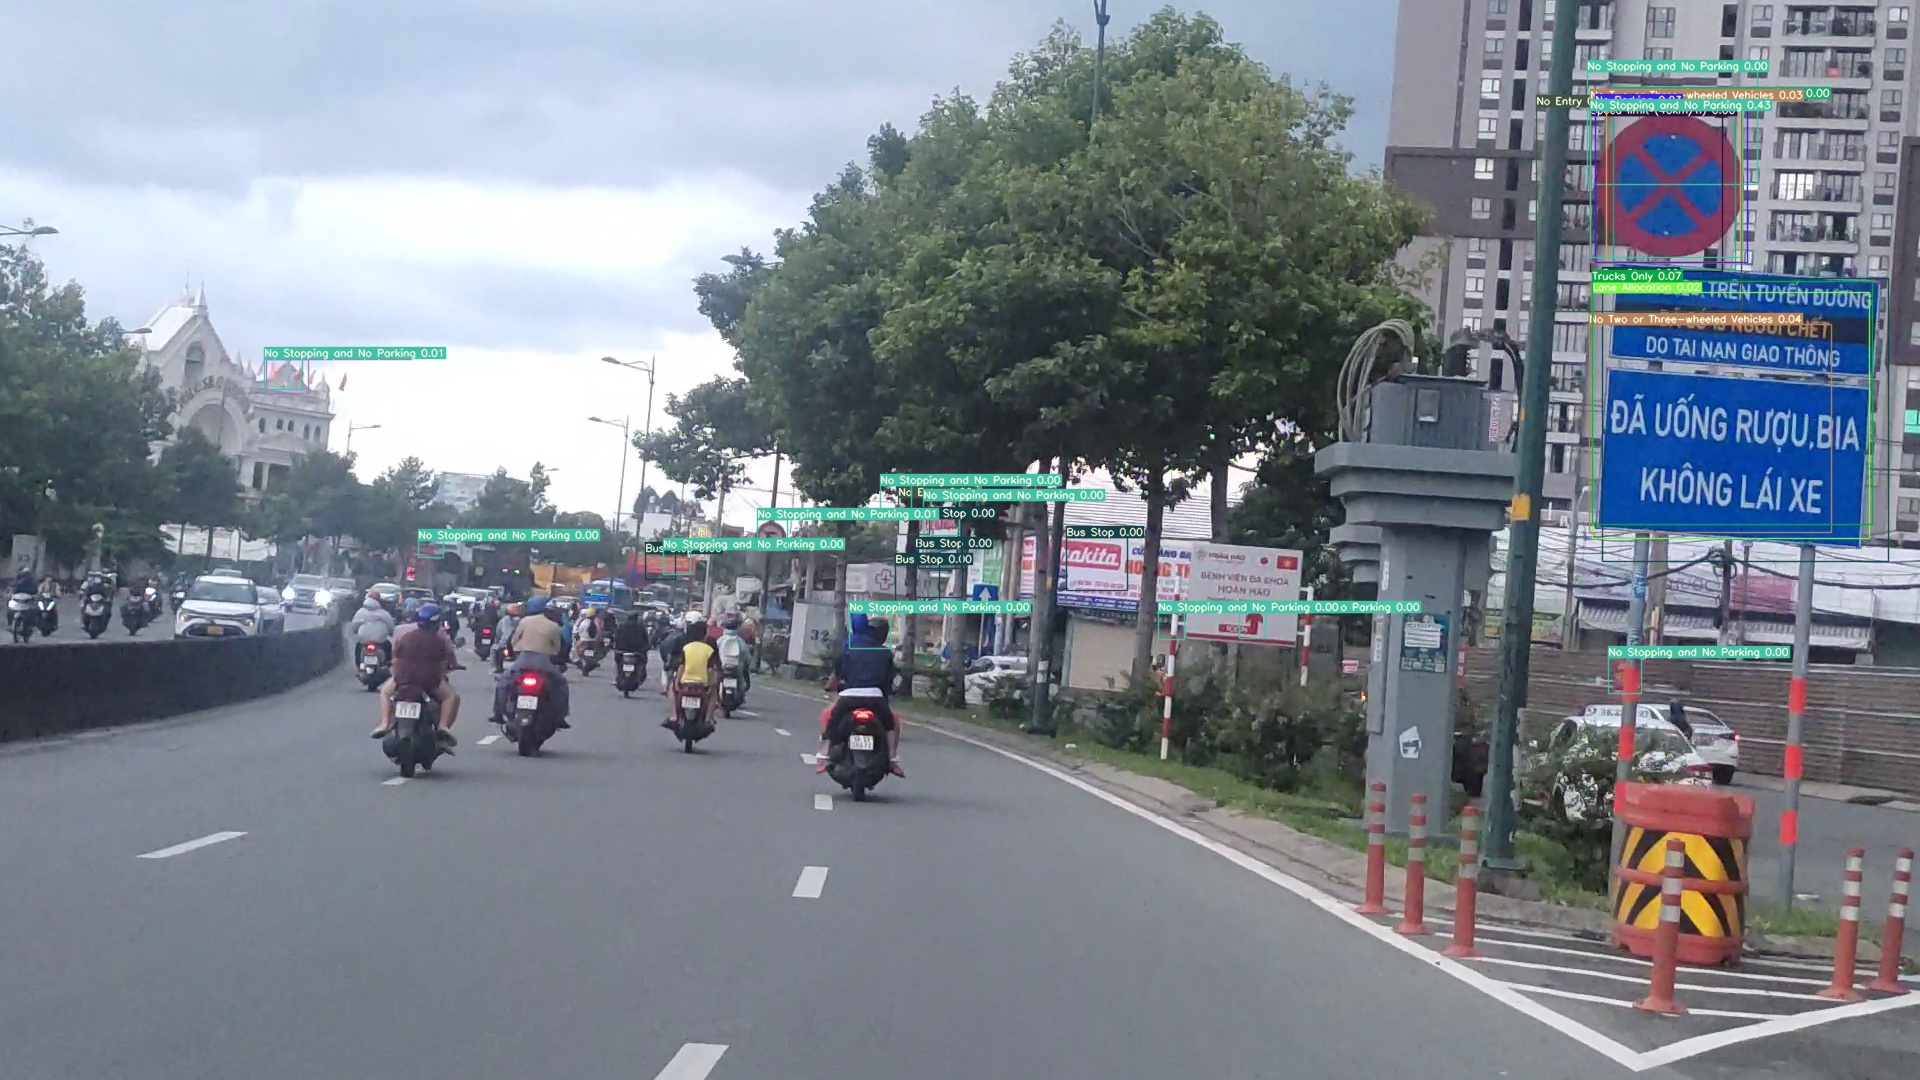

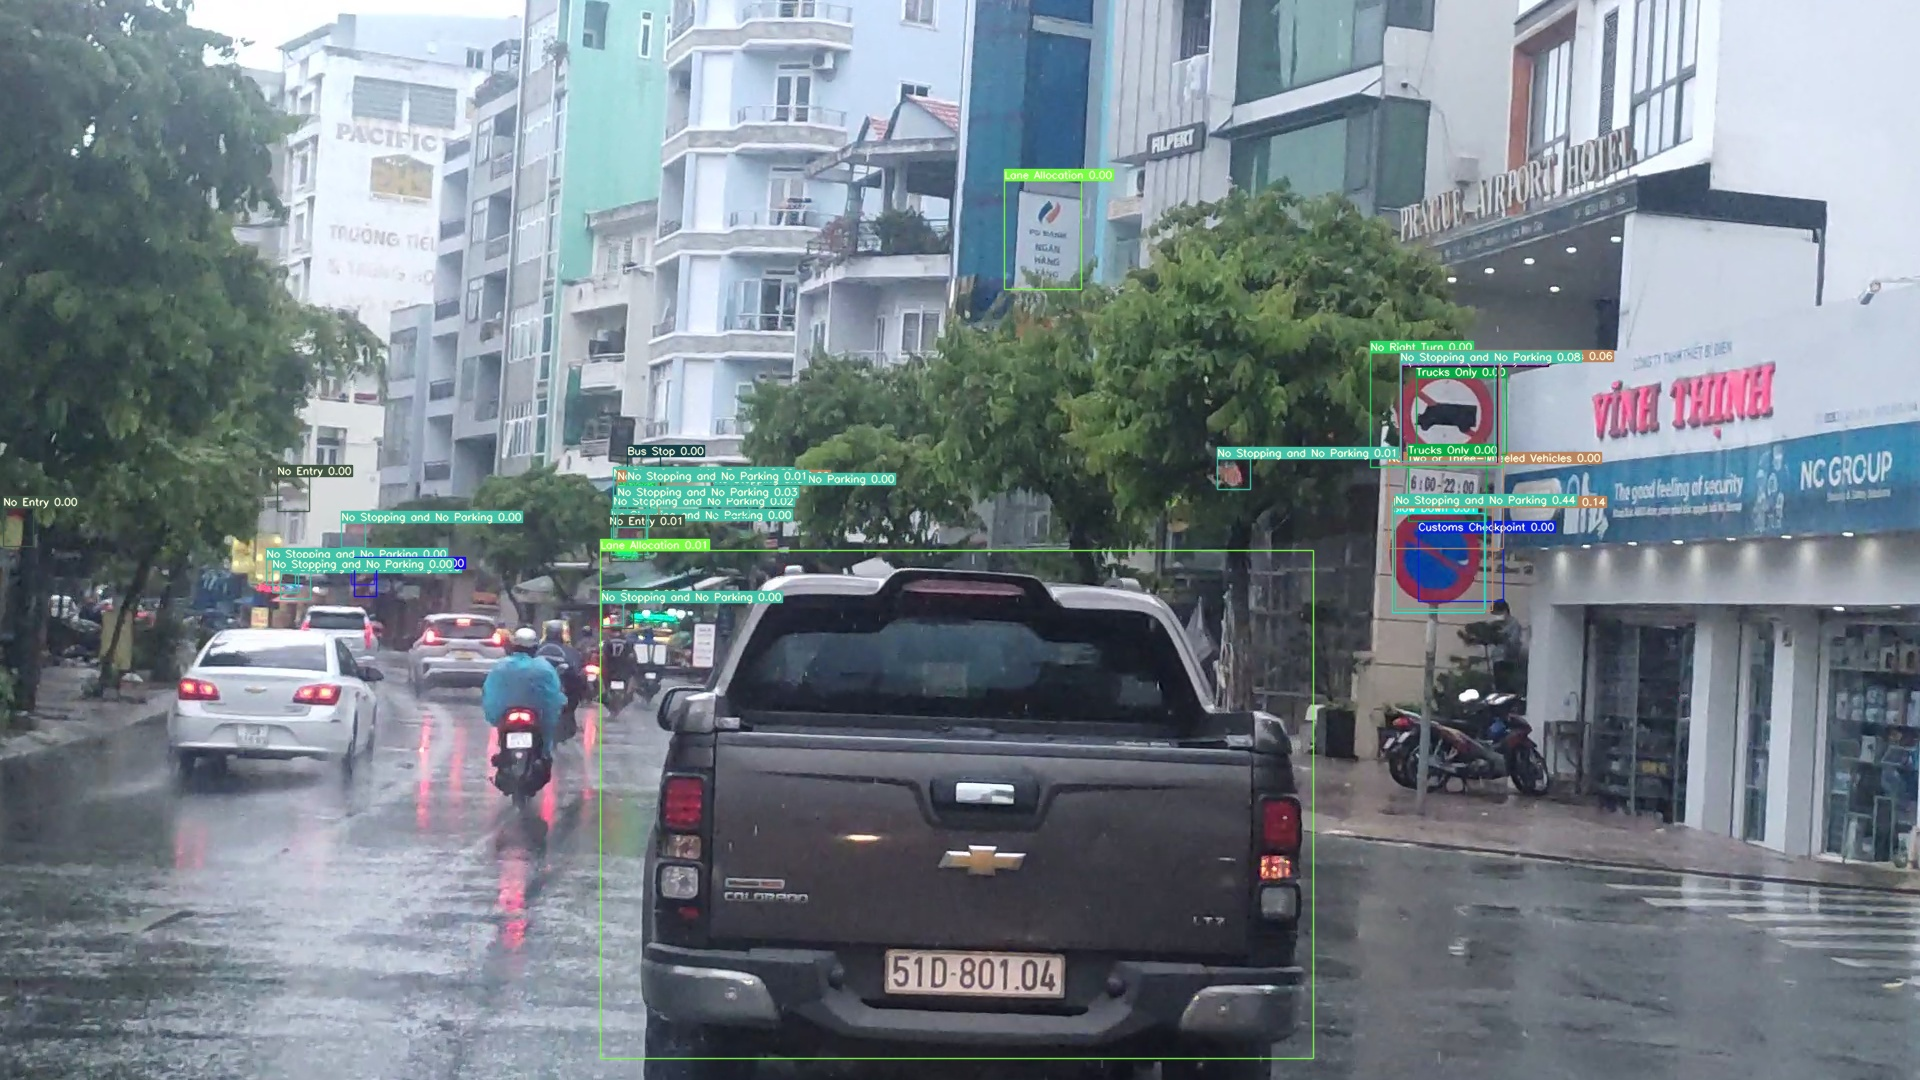

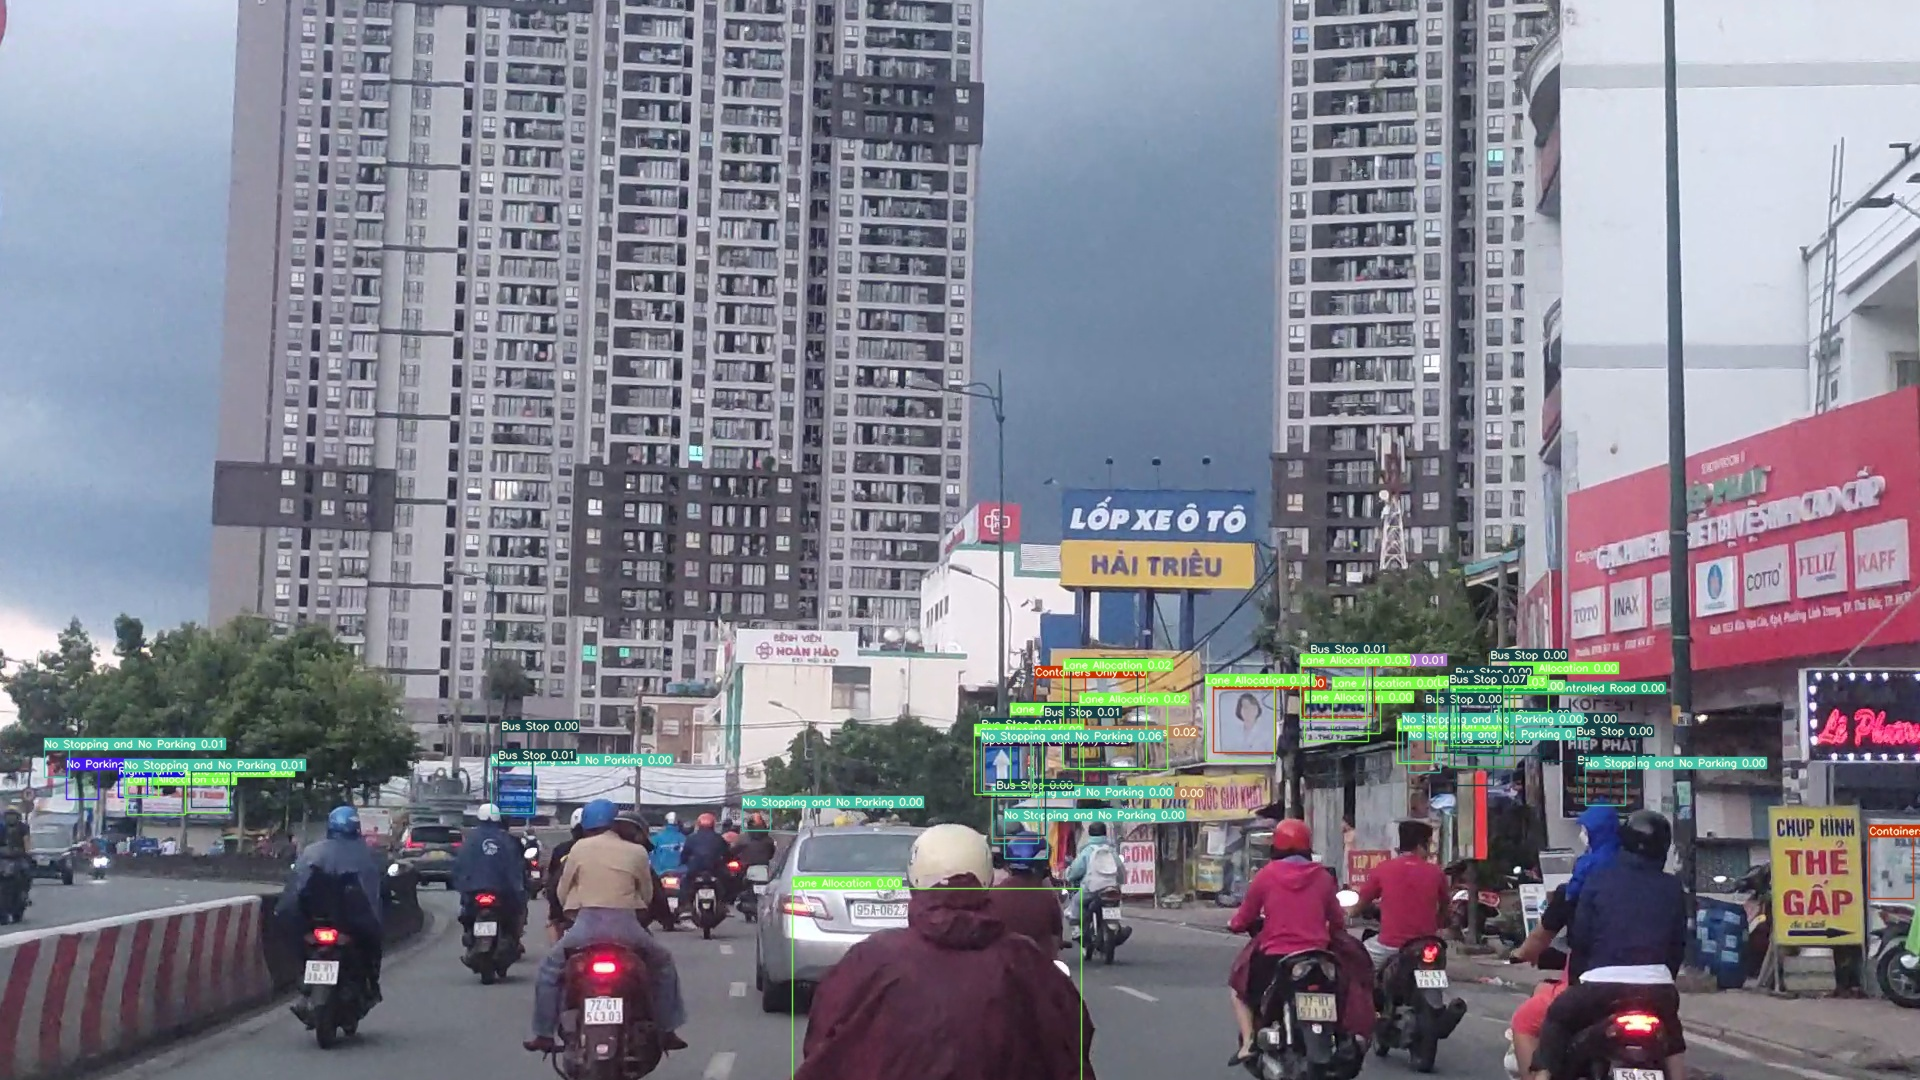

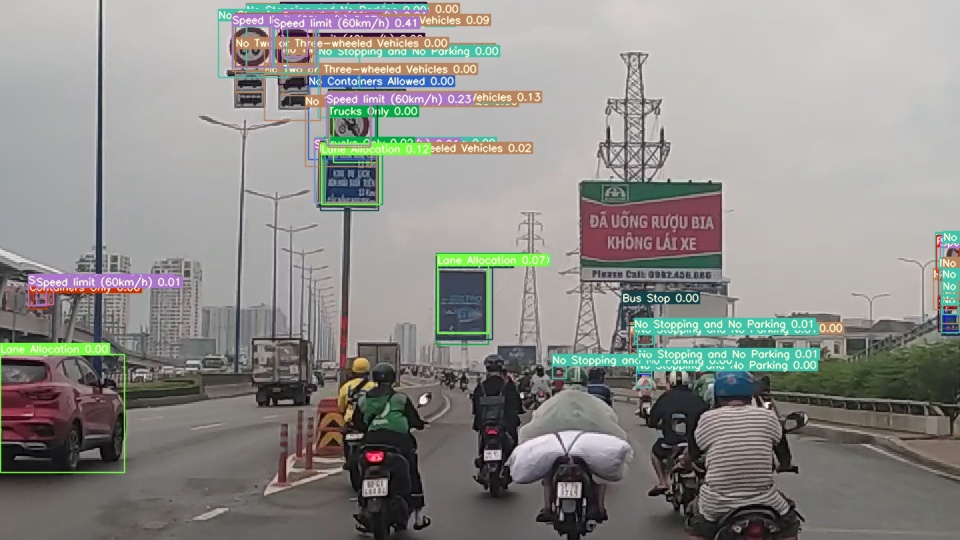

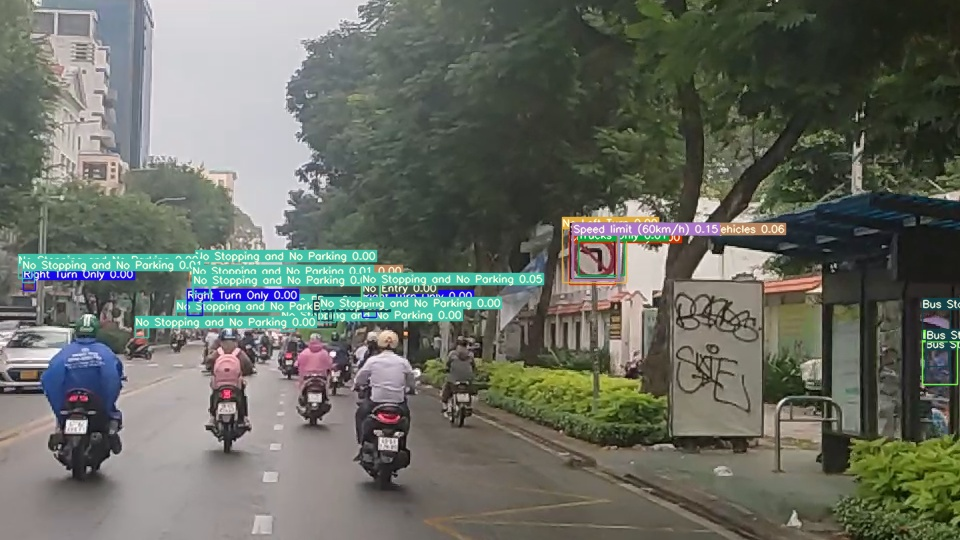

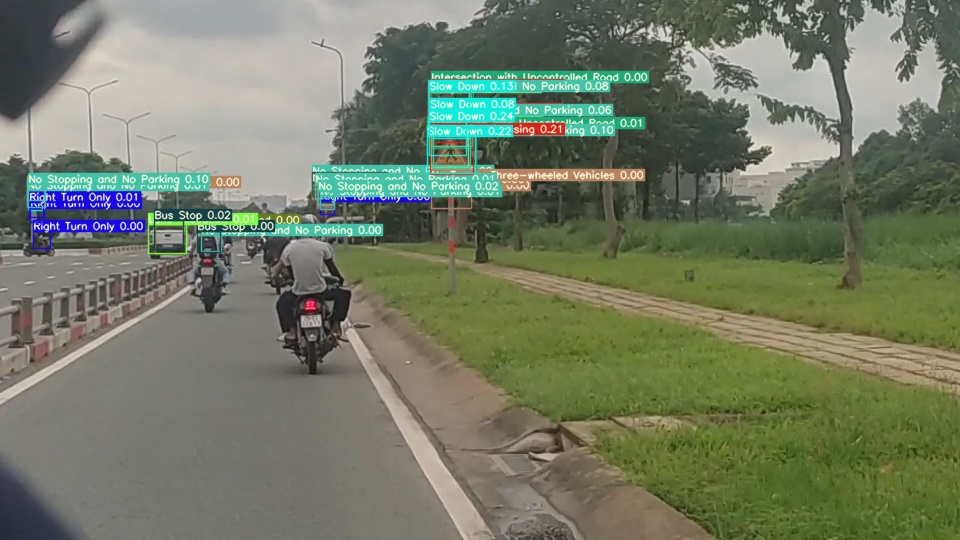

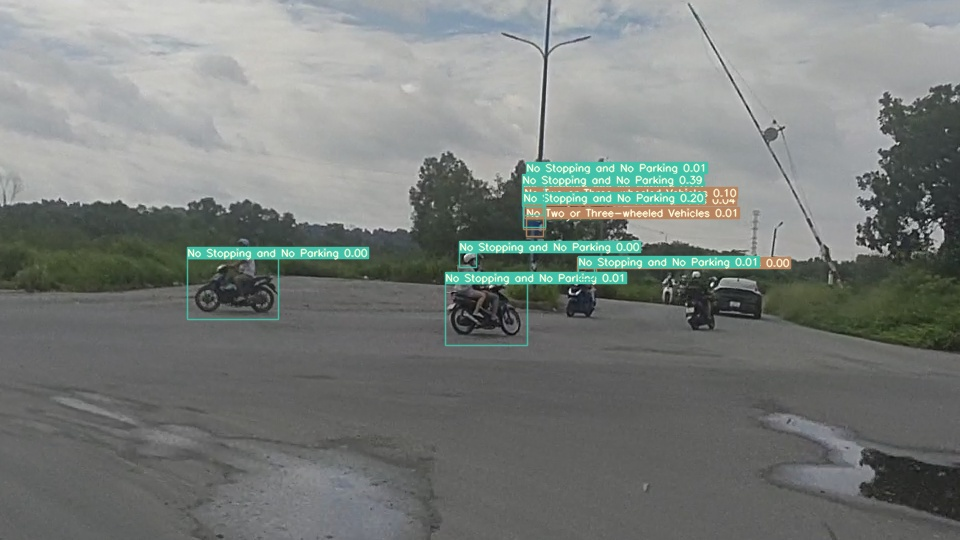

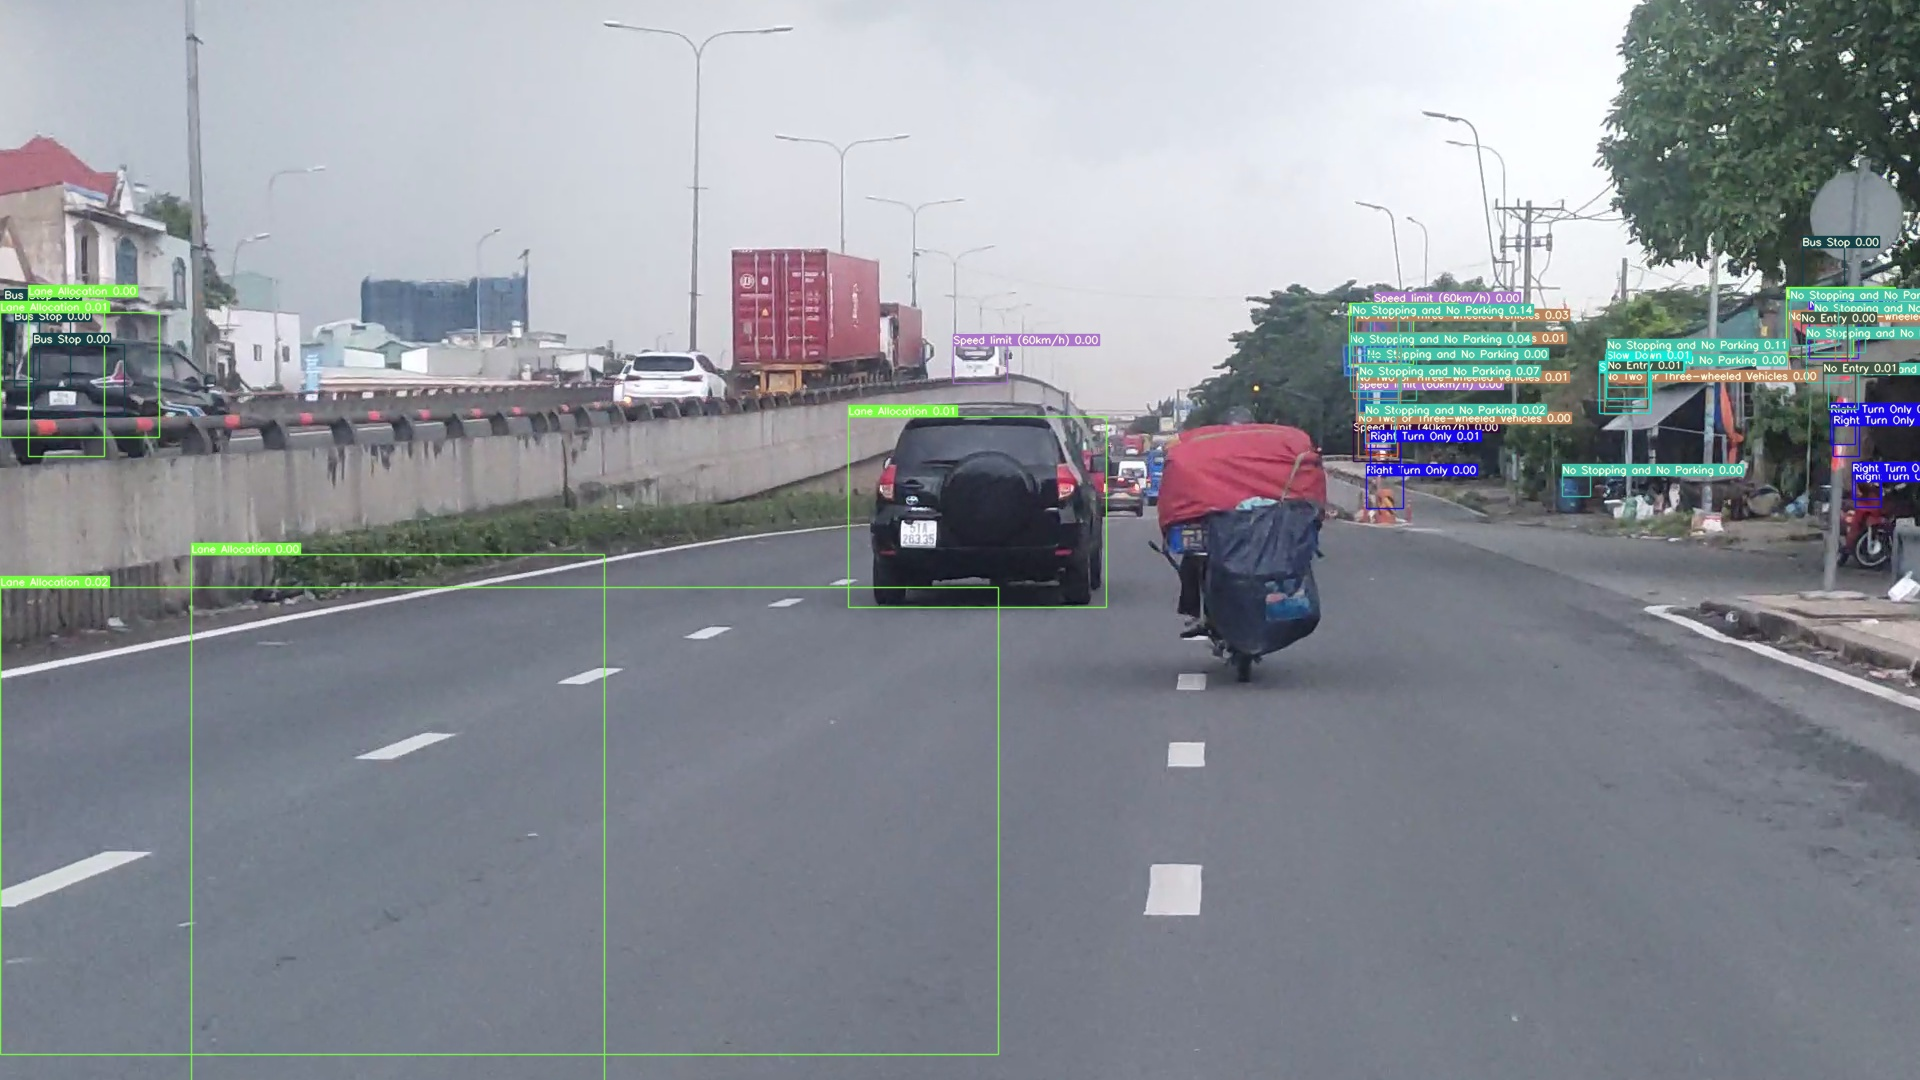

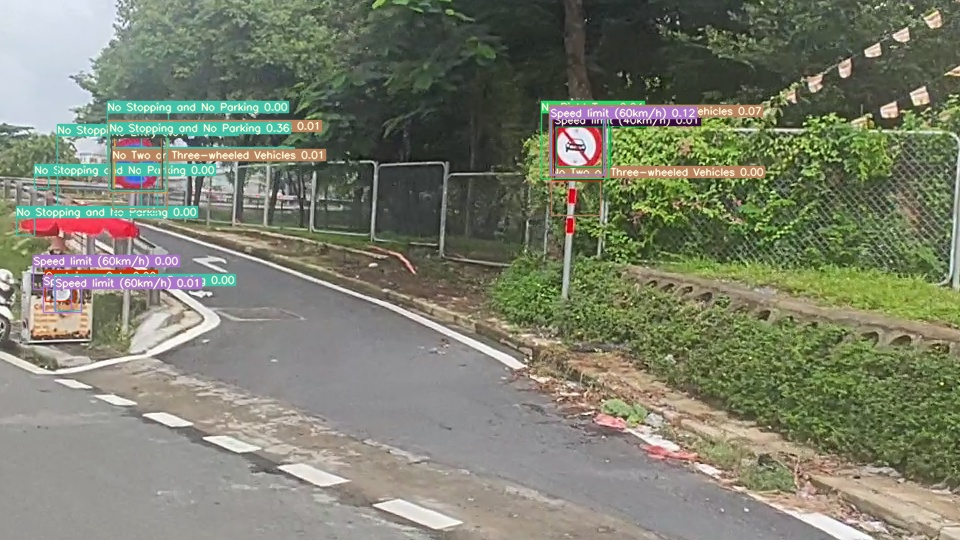

In [ ]:
!pip install gdown
!gdown --id '1zxyu_OUUXbAxtAFez4Qucp_Hdlyuf2SB' --output archive.zip
# extract zip file
!unzip archive.zip -d dataset
!wget https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7-tiny.pt
!git clone https://github.com/WongKinYiu/yolov7
!pip3 install -qr yolov7/requirements.txt

import os
import sys
import glob
import torch
from IPython.display import Image, clear_output, display  # to display images
import random
import shutil

config_file_template = '''
train: train/images
val: val/images

nc: 51
names: ['Pedestrian Crossing', 'Equal-level Intersection', 'No Entry', 'Right Turn Only', 'Intersection', 'Intersection with Uncontrolled Road', 'Dangerous Turn', 'No Left Turn', 'Bus Stop', 'Roundabout', 'No Stopping and No Parking', 'U-Turn Allowed', 'Lane Allocation', 'No Left Turn for Motorcycles', 'Slow Down', 'No Trucks Allowed', 'Narrow Road on the Right', 'No Passenger Cars and Trucks', 'Height Limit', 'No U-Turn', 'No U-Turn and No Right Turn', 'No Cars Allowed', 'Narrow Road on the Left', 'Uneven Road', 'No Two or Three-wheeled Vehicles', 'Customs Checkpoint', 'Motorcycles Only', 'Obstacle on the Road', 'Children Present', 'Trucks and Containers', 'No Motorcycles Allowed', 'Trucks Only', 'Road with Surveillance Camera', 'No Right Turn', 'Series of Dangerous Turns', 'No Containers Allowed', 'No Left or Right Turn', 'No Straight and Right Turn', 'Intersection with T-Junction', 'Speed limit (50km/h)', 'Speed limit (60km/h)', 'Speed limit (80km/h)', 'Speed limit (40km/h)', 'Left Turn', 'Low Clearance', 'Other Danger', 'Go Straight', 'No Parking', 'Containers Only', 'No U-Turn for Cars', 'Level Crossing with Barriers']
'''

with open('data.yaml', 'w') as f:
    f.write(config_file_template)

# Đường dẫn đến thư mục gốc chứa ảnh và nhãn
image_dir = 'dataset/images'
label_dir = 'dataset/labels'

# Đường dẫn đến các thư mục đích
train_image_dir = 'train/images'
train_label_dir = 'train/labels'
val_image_dir = 'val/images'
val_label_dir = 'val/labels'
test_image_dir = 'test/images'
test_label_dir = 'test/labels'

# Tạo các thư mục đích nếu chúng chưa tồn tại
os.makedirs(train_image_dir, exist_ok=True)
os.makedirs(train_label_dir, exist_ok=True)
os.makedirs(val_image_dir, exist_ok=True)
os.makedirs(val_label_dir, exist_ok=True)
os.makedirs(test_image_dir, exist_ok=True)
os.makedirs(test_label_dir, exist_ok=True)

# Lấy danh sách tất cả các tệp ảnh trong thư mục gốc
image_files = [f for f in os.listdir(image_dir) if os.path.isfile(os.path.join(image_dir, f))]

# Tính toán số lượng ảnh cho từng tập dữ liệu
num_images = len(image_files)
num_train_images = int(0.7 * num_images)
num_val_images = int(0.2 * num_images)
num_test_images = num_images - num_train_images - num_val_images

# Xáo trộn danh sách các tệp ảnh
random.shuffle(image_files)

# Sao chép ảnh và nhãn vào các thư mục đích
for i, image_file in enumerate(image_files):
    # Lấy tên tệp không có phần mở rộng
    file_name_without_ext = os.path.splitext(image_file)[0]

    # Đường dẫn đến tệp ảnh và nhãn nguồn
    src_image_path = os.path.join(image_dir, image_file)
    src_label_path = os.path.join(label_dir, file_name_without_ext + '.txt')

    # Xác định thư mục đích dựa trên chỉ số i
    if i < num_train_images:
        dst_image_dir = train_image_dir
        dst_label_dir = train_label_dir
    elif i < num_train_images + num_val_images:
        dst_image_dir = val_image_dir
        dst_label_dir = val_label_dir
    else:
        dst_image_dir = test_image_dir
        dst_label_dir = test_label_dir

    # Đường dẫn đến tệp ảnh và nhãn đích
    dst_image_path = os.path.join(dst_image_dir, image_file)
    dst_label_path = os.path.join(dst_label_dir, file_name_without_ext + '.txt')

    # Sao chép ảnh và nhãn
    shutil.copy(src_image_path, dst_image_path)
    shutil.copy(src_label_path, dst_label_path)

print(f"Đã sao chép {num_train_images} ảnh và nhãn vào thư mục {train_image_dir} và {train_label_dir}")
print(f"Đã sao chép {num_val_images} ảnh và nhãn vào thư mục {val_image_dir} và {val_label_dir}")
print(f"Đã sao chép {num_test_images} ảnh và nhãn vào thư mục {test_image_dir} và {test_label_dir}")

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

!python yolov7/train.py --batch 64 --cfg yolov7/cfg/training/yolov7-tiny.yaml --epochs 20  --data data.yaml --weights 'yolov7-tiny.pt' --device 0 --entity 'yolov7-tiny' --project 'yolov7-tiny' --name 'run1'
!python yolov7/detect.py --weights yolov7-tiny/run1/weights/best.pt --img 416 --conf 0.001 --source test/images

for images in glob.glob('runs/detect/exp/*.jpg')[0:10]:
    display(Image(filename=images))

In [ ]:
!python yolov7/detect.py --weights yolov7-tiny/run1/weights/best.pt --img 416 --conf 0.3 --source test/images

Namespace(weights=['yolov7-tiny/run1/weights/best.pt'], source='test/images', img_size=416, conf_thres=0.3, iou_thres=0.45, device='', view_img=False, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
YOLOR 🚀 v0.1-128-ga207844 torch 2.3.0+cu121 CUDA:0 (Tesla T4, 15102.0625MB)

Fusing layers... 
IDetect.fuse
/usr/local/lib/python3.10/dist-packages/torch/functional.py:512: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3587.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 208 layers, 6142896 parameters, 0 gradients, 13.5 GFLOPS
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

Done. (3.7ms) Inference, (34.7ms) NMS
 The image with the result is saved in: runs/detect/exp2/

In [ ]:
!zip -r train-progress /content/yolov7-tiny/run1

  adding: content/yolov7-tiny/run1/ (stored 0%)
  adding: content/yolov7-tiny/run1/train_batch0.jpg (deflated 5%)
  adding: content/yolov7-tiny/run1/test_batch0_pred.jpg (deflated 3%)
  adding: content/yolov7-tiny/run1/PR_curve.png (deflated 9%)
  adding: content/yolov7-tiny/run1/hyp.yaml (deflated 44%)
  adding: content/yolov7-tiny/run1/P_curve.png (deflated 9%)
  adding: content/yolov7-tiny/run1/train_batch6.jpg (deflated 5%)
  adding: content/yolov7-tiny/run1/train_batch5.jpg (deflated 6%)
  adding: content/yolov7-tiny/run1/test_batch1_labels.jpg (deflated 3%)
  adding: content/yolov7-tiny/run1/train_batch9.jpg (deflated 5%)
  adding: content/yolov7-tiny/run1/confusion_matrix.png (deflated 17%)
  adding: content/yolov7-tiny/run1/results.txt (deflated 71%)
  adding: content/yolov7-tiny/run1/train_batch4.jpg (deflated 6%)
  adding: content/yolov7-tiny/run1/events.out.tfevents.1719756816.5778e697f7d4.2275.0 (deflated 62%)
  adding: content/yolov7-tiny/run1/results.png (deflated 11%)
  